Keys in the .mat file: ['__header__', '__version__', '__globals__', 't', 'X']
Key: t, Shape: (24000, 1)
Key: X, Shape: (24000, 32)

Detailed shapes:
Shape of t: (24000, 1)
Shape of X: (24000, 32)

Interpretation: X has 32 samples, each with 24000 time points


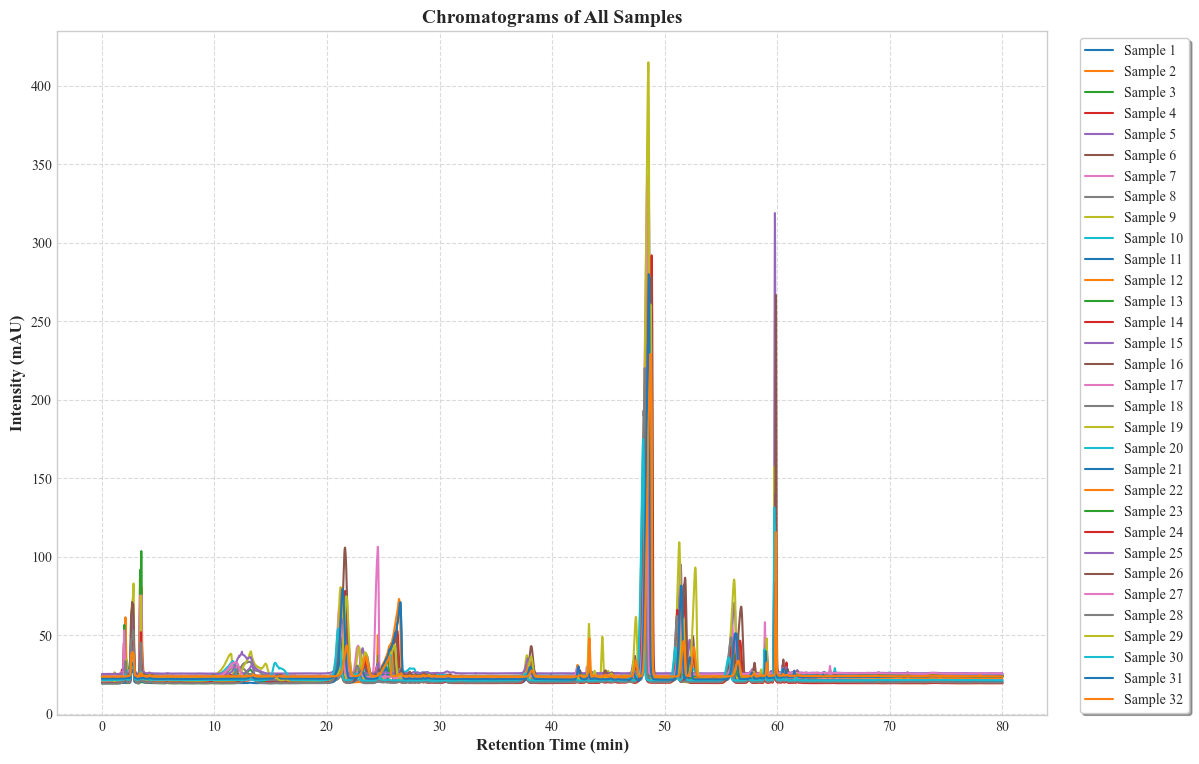

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
plt.style.use('seaborn-v0_8-whitegrid')  
matplotlib.rc('font', family='Times New Roman', size=10) 


file_path = r"C:\Users\64912\Desktop\data\ginseng.mat"
data = loadmat(file_path)
print("Keys in the .mat file:", list(data.keys()))

for key in data.keys():
    if not key.startswith('__'):  # 排除元数据键
        print(f"Key: {key}, Shape: {data[key].shape}")

# 获取保留时间和色谱数据
t = data['t']          # 保留时间
X = data['X']          # 色谱数据

# 检查数据形状
print("\nDetailed shapes:")
print(f"Shape of t: {t.shape}")
print(f"Shape of X: {X.shape}")

# 确定数据结构并绘制图表
fig, ax = plt.subplots(figsize=(12, 8))

if len(X.shape) == 2 and X.shape[0] == t.shape[0]:
    # 情况1: X的行对应时间点，列对应样本
    num_samples = X.shape[1]
    print(f"\nInterpretation: X has {num_samples} samples, each with {X.shape[0]} time points")
    
    for i in range(num_samples):
        ax.plot(t, X[:, i], label=f"Sample {i+1}")

elif len(X.shape) == 2 and X.shape[1] == t.shape[0]:
    # 情况2: X的列对应时间点，行对应样本
    num_samples = X.shape[0]
    print(f"\nInterpretation: X has {num_samples} samples, each with {X.shape[1]} time points")
    
    for i in range(num_samples):
        ax.plot(t, X[i, :], label=f"Sample {i+1}")

elif len(X.shape) == 1 and X.shape[0] == t.shape[0]:
    # 情况3: X是单个样本
    print("\nInterpretation: X is a single sample")
    
    ax.plot(t, X, label="Sample 1")

else:
    # 情况4: 数据结构不符合常见模式
    print("\nWarning: Data structure does not match common patterns")
    print("Please check the data structure and modify the code accordingly")

    # 尝试转置 X 看是否能匹配
    if len(X.shape) == 2:
        X_transposed = X.T
        if X_transposed.shape[0] == t.shape[0]:
            num_samples = X_transposed.shape[1]
            print(f"\nTrying transposed X: {num_samples} samples")
            
            for i in range(num_samples):
                ax.plot(t, X_transposed[:, i], label=f"Sample {i+1}")
        else:
            print("Transposed X still does not match t")

# 添加图表元素
ax.set_xlabel('Retention Time (min)', fontsize=12, fontweight='bold')
ax.set_ylabel('Intensity (mAU)', fontsize=12, fontweight='bold')
ax.set_title('Chromatograms of All Samples', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), frameon=True, shadow=True)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The dataset contains 32 samples


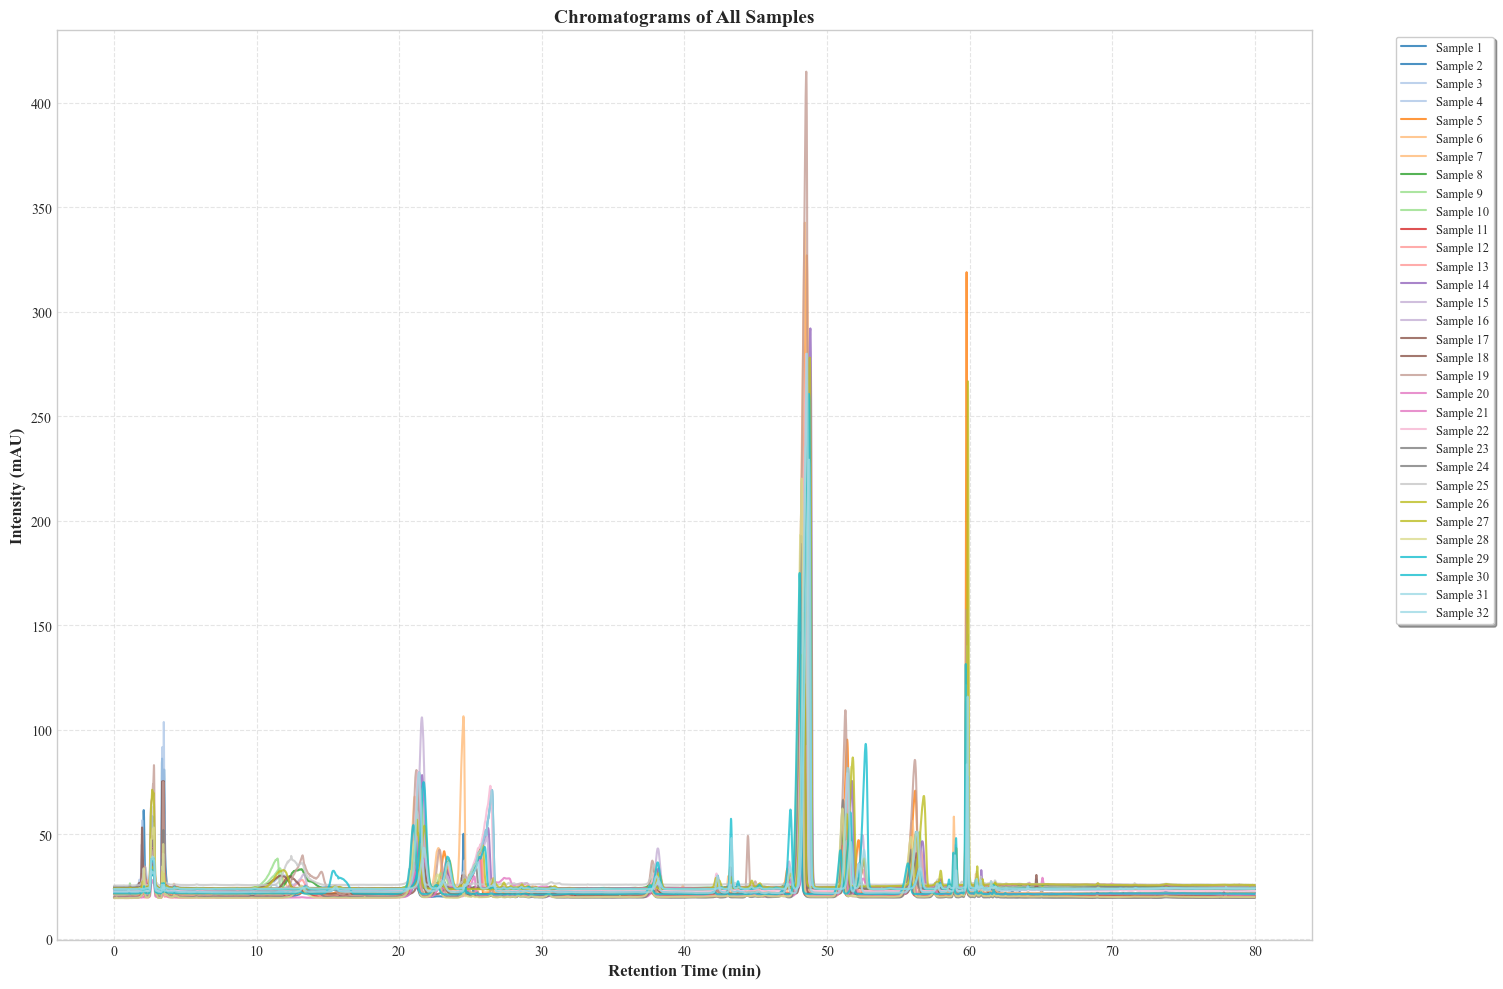

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

# 读取 .mat 文件
file_path = r"C:\Users\64912\Desktop\data\ginseng.mat"
data = loadmat(file_path)

# 获取保留时间和色谱数据
t = data['t'].flatten()  # 保留时间
X = data['X']            # 色谱数据

# 确定样本数目
num_samples = X.shape[1]
print(f"The dataset contains {num_samples} samples")

# 设置图表风格和字体
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 10})

# 绘制所有样本的色谱曲线
fig, ax = plt.subplots(figsize=(15, 10))  # 增大图表尺寸

# 使用更鲜明的颜色和线条样式
colors = plt.cm.tab20(np.linspace(0, 1, num_samples))  # 使用 tab20 色彩映射提供更鲜明的颜色

for i in range(num_samples):
    ax.plot(t, X[:, i], label=f"Sample {i+1}", 
            color=colors[i], linewidth=1.5, alpha=0.8)  # 增加线条宽度和透明度

# 添加图表元素
ax.set_xlabel('Retention Time (min)', fontsize=12, fontweight='bold')
ax.set_ylabel('Intensity (mAU)', fontsize=12, fontweight='bold')
ax.set_title('Chromatograms of All Samples', fontsize=14, fontweight='bold')

# 调整图例位置和样式
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1), 
                   frameon=True, shadow=True, fontsize=9)
legend.set_visible(True)  # 确保图例可见

# 添加网格
ax.grid(True, linestyle='--', alpha=0.5)

# 调整布局
plt.tight_layout()


# 显示图表
plt.show()

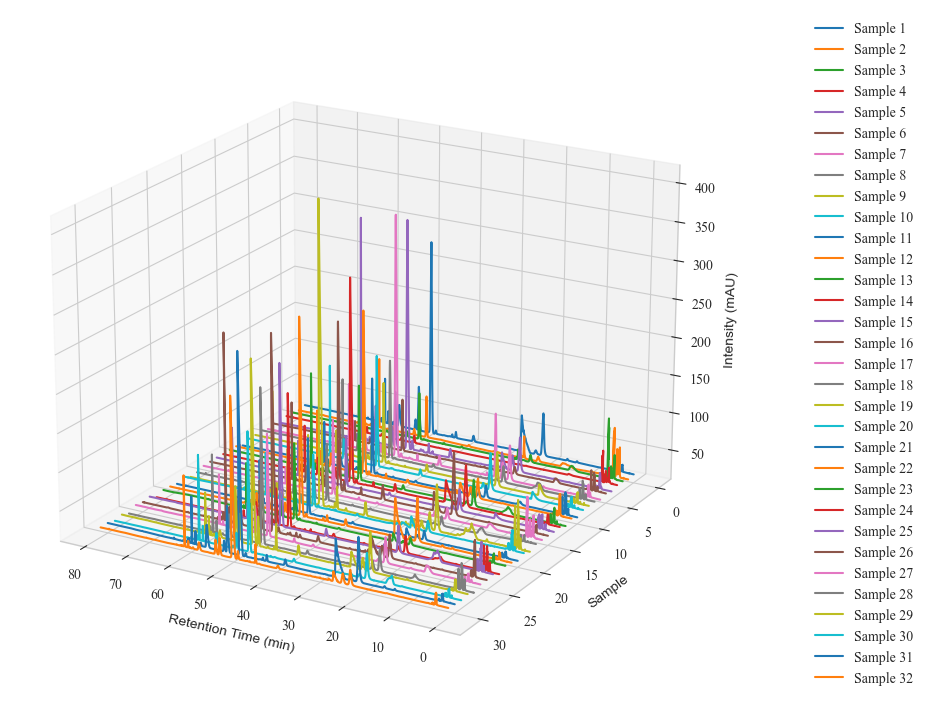

In [25]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 读取 .mat 文件
file_path = r"C:\Users\64912\Desktop\data\ginseng.mat"
data = loadmat(file_path)

# 获取保留时间和色谱数据
t = data['t'].flatten()  # 保留时间
X = data['X']            # 色谱数据

# 创建三维图表
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制每个样本的三维曲线
for i in range(X.shape[1]):
    ax.plot(t, [i] * len(t), X[:, i], linewidth=1.5, label=f'Sample {i+1}')

# 设置坐标轴标签
ax.set_xlabel('Retention Time (min)', fontsize=10, fontfamily='sans-serif')
ax.set_ylabel('Sample', fontsize=10, fontfamily='sans-serif')
ax.set_zlabel('Intensity (mAU)', fontsize=10, fontfamily='sans-serif')

# 设置视角
ax.view_init(elev=20., azim=120)

# 调整布局以适应图例
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0)) 

# 紧凑布局
plt.tight_layout()

# 显示图表
plt.show()